In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

# Arabic_tweets_positive dataset 

In [2]:
cols = ['class','tweet_text']
data_positive = pd.read_csv('/content/train_Arabic_tweets_positive.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [3]:
len(data_positive)

23486

In [4]:
positive = data_positive.drop(range(10000,23486))

In [5]:
len(positive)

10000

In [6]:
positive.head()

,class,tweet_text
0,pos,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,pos,رسميا اختربت نومتي 😀
2,pos,عيونك وطن وأكثر وطن شد انتباهي 😌
3,pos,وحده تهز 👍
4,pos,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...


In [7]:
print(len(positive))

10000


# Dataset analysis

In [8]:
#Checking null values

positive[positive.isnull().any(axis=1)].head()

,class,tweet_text


In [9]:
#Checking null values count

np.sum(positive.isnull().any(axis=1))

0

In [10]:
positive.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [11]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       10000 non-null  object
 1   tweet_text  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


# cleaning tweet text

In [12]:
 positive['tweet_text'][0] 

'الي يتابعني من زمان يعرف اني ما حفزت على الحضور هالموسم ومقاطع المدرج من فترة طويلة بسبب الفشل ولكن الحين اقول لكم…'

In [13]:
# for letter in '…_,#][()-.:،|%!*=':
#     print("Before________________________________________________",positive['tweet_text'][0])
#     positive['tweet_text'] = positive['tweet_text'].astype(str).str.replace(letter,'')
#     print("after_________________________________________________",positive['tweet_text'][0])
#     print("letter --------------------------------------------------",letter)

In [14]:
positive.head()

,class,tweet_text
0,pos,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,pos,رسميا اختربت نومتي 😀
2,pos,عيونك وطن وأكثر وطن شد انتباهي 😌
3,pos,وحده تهز 👍
4,pos,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...


# Preprocess data

In [15]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

print(punctuations_list)

translator = str.maketrans('', '', punctuations_list) # translate punctuations_list to Ascii Code
print(translator)

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{96: None, 247: None, 215: None, 1563: None, 60: None, 62: None, 95: None, 40: None, 41: None, 42: None, 38: None, 94: None, 37: None, 93: None, 91: None, 1600: None, 1548: None, 47: None, 58: None, 34: None, 1567: None, 46: None, 44: None, 39: None, 123: None, 125: None, 126: None, 166: None, 43: None, 124: None, 33: None, 8221: None, 8230: None, 8220: None, 8211: None, 35: None, 36: None, 45: None, 59: None, 61: None, 63: None, 64: None, 92: None}


In [17]:
#normalize_arabic

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [18]:
#remove_repeating_char

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [19]:
# processPost for applying all functions
def processPost(tweet): 

    # Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    # Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    # Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    # tweet= normalize_arabic(tweet)
    
    # remove repeated letters

    tweet= remove_repeating_char(tweet)
    
    return tweet

In [20]:
# applying processPost function for preprocessing

positive["tweet_text"] = positive['tweet_text'].apply(lambda x: processPost(x)) # apply used to call the method processpost

In [21]:
# Getting Tokenize the tweet text

tokenizer = RegexpTokenizer(r'\w+')
positive["tweet_text"] = positive["tweet_text"].apply(tokenizer.tokenize)

In [22]:
positive["tweet_text"].head()

0    [الي, يتابعني, من, زمان, يعرف, اني, ما, حفزت, ...
1                               [رسميا, اختربت, نومتي]
2                [عيونك, وطن, وأكثر, وطن, شد, انتباهي]
3                                          [وحده, تهز]
4    [شهور, اله, يهديك, يا, حليمه, لا, تحطين, قلوب,...
Name: tweet_text, dtype: object

# Stop words 

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords_list = stopwords.words('arabic')

In [25]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [26]:
print(len(stopwords_list))

754


In [27]:
print(type(stopwords_list))

<class 'list'>


In [28]:
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 

In [29]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

# Removing stop words

In [30]:
positive["tweet_text"]=positive["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

# Tweet text information

In [31]:
all_words = [word for tokens in positive["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in positive["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

96488 words total, with a vocabulary size of 26484
Max sentence length is 888


# top 25 words in positive

In [32]:
counter = Counter(all_words)

In [33]:
counter.most_common(25)

[('اله', 1921),
 ('pos', 834),
 ('الهم', 827),
 ('الهلال', 544),
 ('الخير', 441),
 ('رتويت', 404),
 ('الي', 399),
 ('السحب', 372),
 ('يارب', 337),
 ('سحب', 294),
 ('الحمد', 289),
 ('فوز', 287),
 ('يوم', 267),
 ('مبروك', 255),
 ('النصر', 253),
 ('انا', 250),
 ('بمناسبة', 239),
 ('ان', 233),
 ('ساعة', 232),
 ('قال', 222),
 ('واله', 217),
 ('محمد', 206),
 ('اليوم', 194),
 ('XR', 188),
 ('خير', 181)]

In [34]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

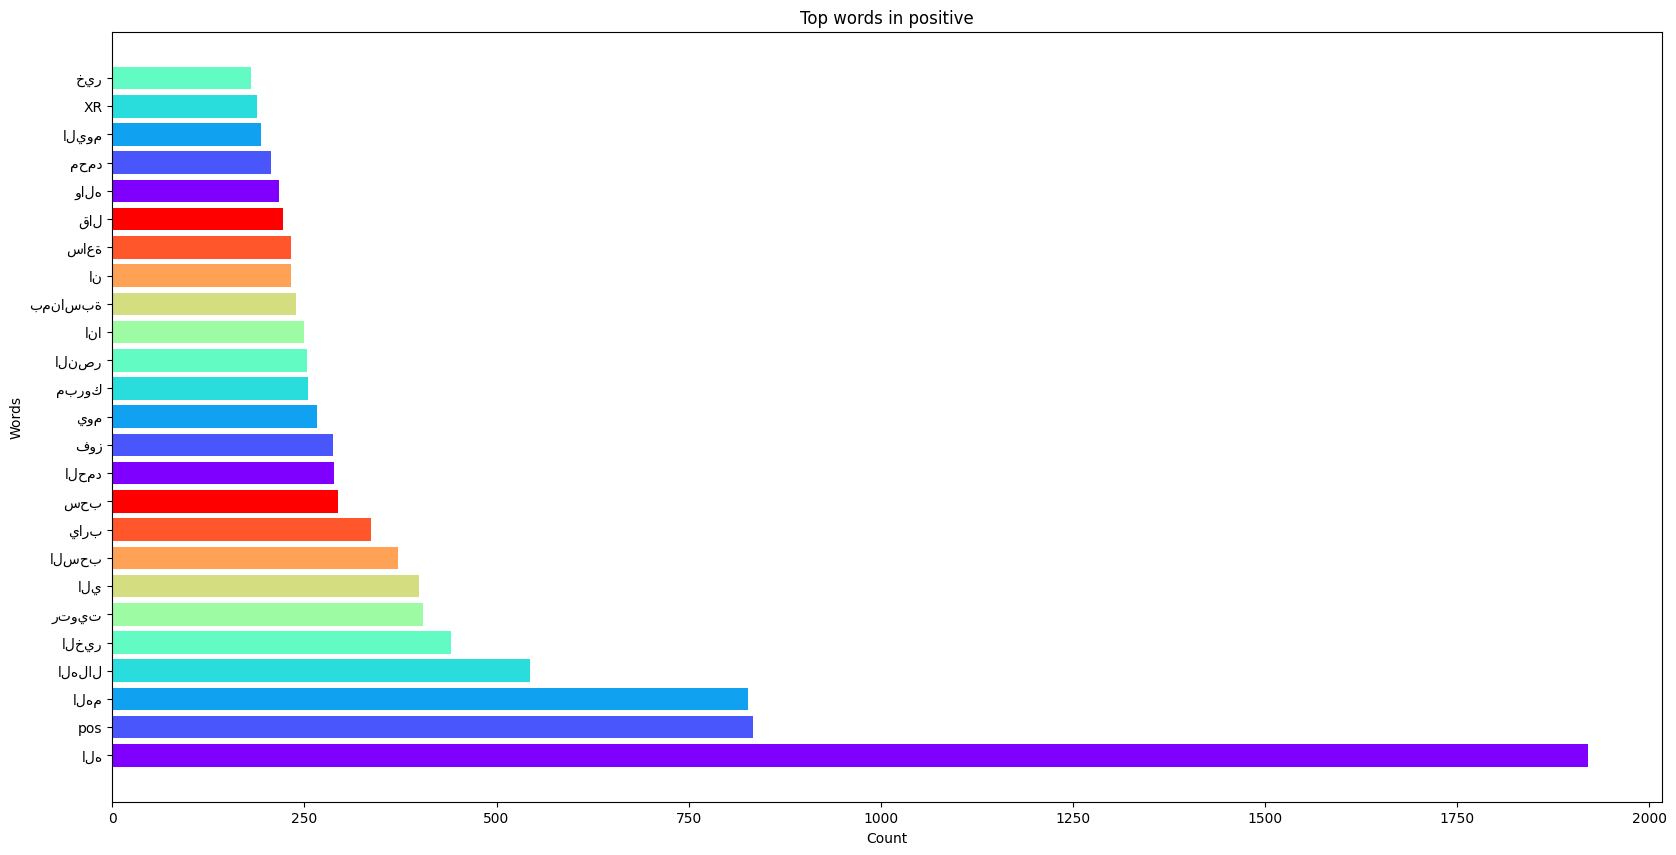

In [35]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Arabic_tweets_negative dataset 

In [36]:
cols = ['class','tweet_text']
data_negative = pd.read_csv('/content/train_Arabic_tweets_negative.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [37]:
len(data_negative)

23933

In [38]:
negative = data_negative.drop(range(10000,23933))

In [39]:
len(negative)

10000

# showing top 5 records

In [40]:
negative.head()

,class,tweet_text
0,neg,لا يغرك سكوتي ترا البعد ماينطاق الدمع بلل خدود...
1,neg,أشجار جزيرة سقطرى العجيبه والفريدة من نوعها، ي...
2,neg,أشين انواع الزعل أنك تزعل ومحد درى عنك 🙄 يعني ...
3,neg,كذا بنفقد الاطراف في الهجوم 💔
4,neg,…


# Count of negative tweets

In [41]:
print(len(negative))

10000


# Getting tweet text

In [42]:
negative['tweet_text'].head()

0    لا يغرك سكوتي ترا البعد ماينطاق الدمع بلل خدود...
1    أشجار جزيرة سقطرى العجيبه والفريدة من نوعها، ي...
2    أشين انواع الزعل أنك تزعل ومحد درى عنك 🙄 يعني ...
3                        كذا بنفقد الاطراف في الهجوم 💔
4                                                    …
Name: tweet_text, dtype: object

# Getting target class

In [43]:
negative['class'].head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

# Dataset analysis

# Checking null values

In [44]:
negative[negative.isnull().any(axis=1)].head()

,class,tweet_text


# Checking null values count

In [45]:
np.sum(negative.isnull().any(axis=1))

0

In [46]:
negative.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [47]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       10000 non-null  object
 1   tweet_text  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


# cleaning tweet text

In [48]:
for letter in '#.][!XR':
    negative['tweet_text'] = negative['tweet_text'].astype(str).str.replace(letter,'')

In [49]:
negative.head()

,class,tweet_text
0,neg,لا يغرك سكوتي ترا البعد ماينطاق الدمع بلل خدود...
1,neg,أشجار جزيرة سقطرى العجيبه والفريدة من نوعها، ي...
2,neg,أشين انواع الزعل أنك تزعل ومحد درى عنك 🙄 يعني ...
3,neg,كذا بنفقد الاطراف في الهجوم 💔
4,neg,…


# applying processPost function for preprocessing

In [50]:
negative["tweet_text"] = negative['tweet_text'].apply(lambda x: processPost(x)) # apply used to call the method processpost

# Getting Tokenize the tweet text

In [51]:

tokenizer = RegexpTokenizer(r'\w+')
negative["tweet_text"] = negative["tweet_text"].apply(tokenizer.tokenize)

In [52]:
negative["tweet_text"].head()

0    [لا, يغرك, سكوتي, ترا, البعد, ماينطاق, الدمع, ...
1    [أشجار, جزيرة, سقطرى, العجيبه, والفريدة, من, ن...
2    [أشين, انواع, الزعل, أنك, تزعل, ومحد, درى, عنك...
3                    [كذا, بنفقد, الاطراف, في, الهجوم]
4                                                   []
Name: tweet_text, dtype: object

# Removing stop words

In [53]:
negative["tweet_text"]=negative["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

# Tweet text information

In [54]:
all_words = [word for tokens in negative["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in negative["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

84240 words total, with a vocabulary size of 24676
Max sentence length is 334


# top 25 words in negative

In [55]:
counter = Counter(all_words)

In [56]:
counter.most_common(25)

[('اله', 1021),
 ('الي', 531),
 ('واله', 470),
 ('انا', 425),
 ('ان', 339),
 ('الهم', 250),
 ('الناس', 226),
 ('مو', 225),
 ('يارب', 223),
 ('مش', 207),
 ('يعني', 201),
 ('مافي', 201),
 ('عشان', 200),
 ('يوم', 200),
 ('شي', 199),
 ('الاتحاد', 170),
 ('دي', 168),
 ('اليوم', 154),
 ('الخير', 149),
 ('الام', 148),
 ('الهلال', 148),
 ('neg', 148),
 ('وانا', 144),
 ('اي', 143),
 ('فض', 141)]

In [57]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

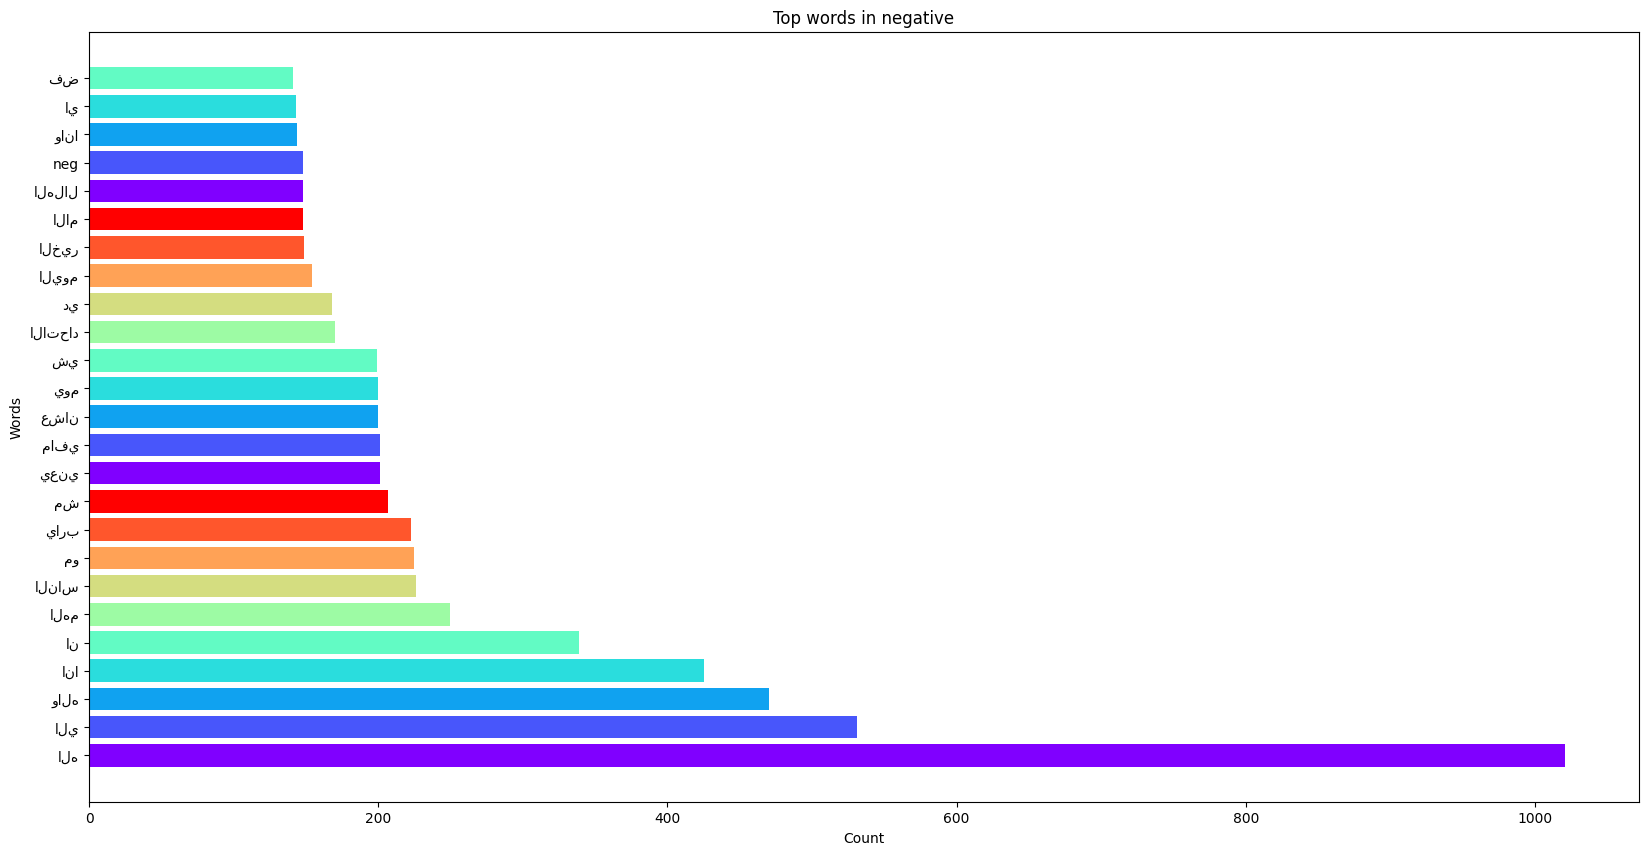

In [58]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in negative')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Combining the positive and negative classes and tweets text

In [59]:
final_data = pd.concat([positive, negative], axis=0)

In [60]:
final_data.head()

,class,tweet_text
0,pos,"[الي, يتابعني, زمان, يعرف, اني, حفزت, الحضور, ..."
1,pos,"[رسميا, اختربت, نومتي]"
2,pos,"[عيونك, وطن, وأكثر, وطن, شد, انتباهي]"
3,pos,"[وحده, تهز]"
4,pos,"[شهور, اله, يهديك, حليمه, تحطين, قلوب, صفراء, ..."


# total count of final data

In [61]:
print(len(final_data))

20000


# Count of each target class

In [62]:
y=final_data['class']
y.value_counts()

pos    10000
neg    10000
Name: class, dtype: int64

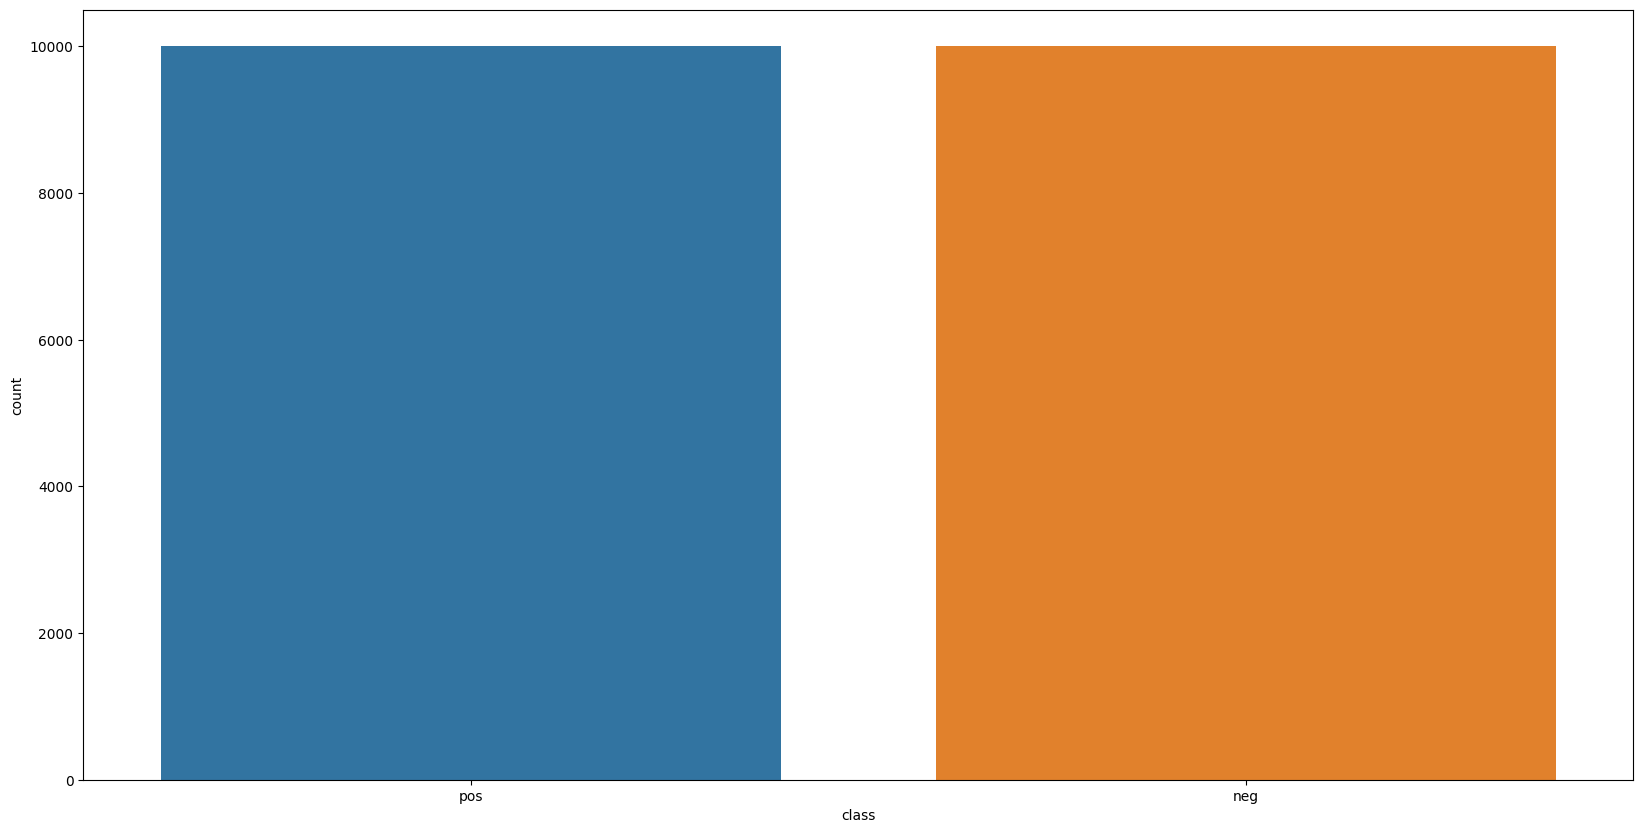

In [63]:
sns.countplot(data= final_data, x = "class")
plt.show()

# Features Extraction from tweets text with TFIDF unigram

In [65]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(final_data['tweet_text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names_out()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

,10,1953,40,412,413,419,4310,50,50k,650,...,ڪل,ڪن,گل,گلبي,گلنا,گم,گن,ھادي,ۈل,یبقی
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# encoding class as 1 for Postive class and 0 for negative class

In [66]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(final_data['class'])
final_data['class'] = encpro

# By getting features and Class

In [68]:
y=final_data['class']
X=unigramdata_features

# Spliting Dataset into 70% Training and 30% Testing

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# --------Trainig and Testing with Machine Learning Algorithms ----------------

In [70]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

#### Accuracy

In [71]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.703


#### Precision

In [72]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.63 %


#### Recall

In [73]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.52 %


#### F1

In [74]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.63 %


# LogisticRegression Algorithm

In [75]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1)

#### Accuracy

In [76]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.744


#### Precision

In [77]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.73 %


#### Recall

In [78]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.71 %


#### F1

In [79]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.73 %


# Comparison of all algorithms Results

In [80]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
|     Naive Bayes Algorithm     |   0.7    |
| Logistic Regression Algorithm |   0.74   |
+-------------------------------+----------+




# Training Logistic Regression algorithm on all data because now we know that is giving better results so we can use the final model application as well

In [81]:
RC =LogisticRegression(penalty = 'l2', C = 1)
RC.fit(X,y)

LogisticRegression(C=1)

# Prediction on sample text

In [90]:
tv=['انت جميل']

In [91]:
x = word_vectorizer.transform(tv)

In [92]:
pred=RC.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

  Prediction
0        pos


# Showing prediction with tweet text

In [93]:
result=pd.DataFrame()
result['Text']=tv
result['Prediction']=prediction
result

,Text,Prediction
0,انت جميل,pos
